In [1]:
import librosa
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split

def extract_features(file_path, n_mfcc=13, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs.T

def train_hmm(X_train, n_components=3, covariance_type='diag', n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type=covariance_type, n_iter=n_iter)
    model.fit(X_train)
    return model

def test_hmm(model, X_test):
    log_likelihoods = model.score(X_test)
    predicted_labels = model.predict(X_test)
    return predicted_labels, log_likelihoods

if __name__ == "__main__":
    speech_files = ["Lab_01.wav"]
    X = []
    for file_path in speech_files:
        features = extract_features(file_path)
        X.append(features)

    X = np.vstack(X)

    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

    model = train_hmm(X_train)

    predicted_labels, log_likelihoods = test_hmm(model, X_test)
    print("Predicted labels:", predicted_labels)
    print("Log likelihoods of the test set:", log_likelihoods)


Predicted labels: [2 1 2 2 0 2 1 1 2 2 2 1 2 1 2 1 2 0 1 1 2 2 2 2 1 2 1 2 2 2 2 0]
Log likelihoods of the test set: -1785.6746589916636


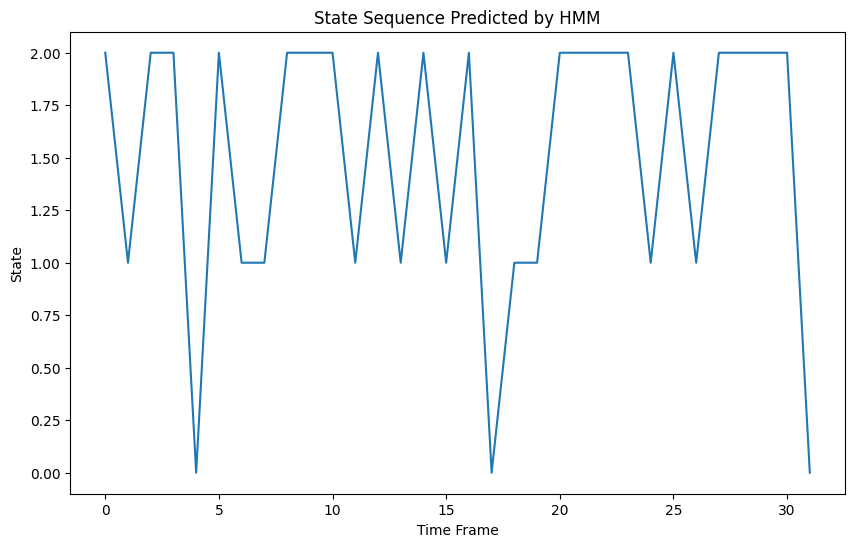

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by HMM')
plt.plot(predicted_labels)
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()